In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns",None)

import pandasql as psql

In [2]:
df1=pd.read_csv(r'transactions_train.csv.',header=0)

dfbk1=df1.copy()

df1.head()

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [3]:
df1

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6351188,699,TRANSFER,162326.52,C1557504343,162326.52,0.00,C404511346,0.00,0.00,1
6351189,699,CASH_OUT,162326.52,C1532317723,162326.52,0.00,C446134087,0.00,162326.52,1
6351190,699,TRANSFER,2763398.31,C577803442,2763398.31,0.00,C619602282,0.00,0.00,1
6351191,699,CASH_OUT,2763398.31,C1491503658,2763398.31,0.00,C454424230,339515.35,3102913.66,1


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6351193 entries, 0 to 6351192
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrig  float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 484.6+ MB


In [5]:
df1.describe()

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.351193e+06,6.351193e+06,6.351193e+06,6.351193e+06,6.351193e+06,6.351193e+06,6.351193e+06
mean,2.425553e+02,1.798155e+05,8.347957e+05,8.561696e+05,1.101043e+06,1.225372e+06,1.215047e-03
std,1.410676e+02,6.036310e+05,2.889959e+06,2.926073e+06,3.398924e+06,3.674293e+06,3.483635e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.550000e+02,1.338829e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.380000e+02,7.486483e+04,1.415300e+04,0.000000e+00,1.330865e+05,2.149190e+05,0.000000e+00
75%,3.340000e+02,2.087152e+05,1.073460e+05,1.443651e+05,9.438661e+05,1.112791e+06,0.000000e+00
max,6.990000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [6]:
#checking whether the dataset imbalance or not

exi=df1.isFraud.value_counts()
print('Class 0',exi[0])
print('Class 1',exi[1])
print('Properties',round(exi[0]/exi[1],2),":1")
print('Total Bank Records',len(df1))

Class 0 6343476
Class 1 7717
Properties 822.01 :1
Total Bank Records 6351193


In [7]:
#splitting the dataset on basis of isFraud value

q1=psql.sqldf('select * from df1 where isFraud=1')
q2=psql.sqldf('select * from df1 where isFraud=0')

In [8]:
#taking the 10% of the non-fradulent data

q3=q2.groupby('isFraud',group_keys=False).apply(lambda x:x.sample(frac=0.1))

In [9]:
#merging both q1 and q3 dataframe

df1=pd.concat([q1,q3])

In [10]:
exi=df1.isFraud.value_counts()
print('Class 0',exi[0])
print('Class 1',exi[1])
print('Properties',round(exi[0]/exi[1],2),":1")
print('Total Bank Records',len(df1))

Class 0 634348
Class 1 7717
Properties 82.2 :1
Total Bank Records 642065


In [11]:
df1['isFraud']=df1['isFraud'].astype(int)

In [12]:
df1['step']=df1['step'].astype(int)

In [13]:
df1.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrig    0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [14]:
df1[df1.duplicated(keep='last')]

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud


In [15]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

df1['type']=LE.fit_transform(df1['type'])

In [16]:
df1['type'].value_counts()

1    227239
3    214683
0    139789
4     56324
2      4030
Name: type, dtype: int64

In [17]:
df1['oldbalanceOrig'].value_counts()

0.00           210523
10000000.00       124
121.00            110
152.00            105
136.00            105
                ...  
4980.93             1
239666.61           1
4801476.51          1
36315.00            1
137181.00           1
Name: oldbalanceOrig, Length: 261075, dtype: int64

In [18]:
df1['nameDest']=LE.fit_transform(df1['nameDest'])
df1['nameOrig']=LE.fit_transform(df1['nameOrig'])

In [19]:
df1.describe()

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
count,642065.000000,642065.000000,6.420650e+05,642065.000000,6.420650e+05,6.420650e+05,642065.000000,6.420650e+05,6.420650e+05,642065.000000
mean,243.810728,1.720455,1.941302e+05,320981.788708,8.456716e+05,8.513155e+05,200159.124327,1.096005e+06,1.228264e+06,0.012019
std,142.381040,1.353478,6.633267e+05,185320.231065,2.903200e+06,2.924062e+06,128204.120686,3.471240e+06,3.756703e+06,0.108971
min,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,155.000000,1.000000,1.361749e+04,160490.000000,0.000000e+00,0.000000e+00,92681.000000,0.000000e+00,0.000000e+00,0.000000
50%,246.000000,1.000000,7.687298e+04,320980.000000,1.483566e+04,0.000000e+00,184826.000000,1.288088e+05,2.138440e+05,0.000000
75%,336.000000,3.000000,2.121987e+05,481471.000000,1.138840e+05,1.402061e+05,300237.000000,9.357093e+05,1.113429e+06,0.000000
max,699.000000,4.000000,6.423445e+07,641965.000000,5.958504e+07,4.958504e+07,460741.000000,3.279981e+08,3.284317e+08,1.000000


In [20]:
IndepVar=[]
for col in df1.columns:
    if col!='isFraud':
        IndepVar.append(col)
TargetVar='isFraud'

x=df1[IndepVar]
y=df1[TargetVar]

In [21]:
# Random oversampling can be implemented using the RandomOverSampler class

from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy=0.125)

x_over, y_over = oversample.fit_resample(x, y)

print(x_over.shape)
print(y_over.shape)

(713641, 9)
(713641,)


In [22]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size = 0.30, random_state = 42)

# Display the shape 

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((499548, 9), (214093, 9), (499548,), (214093,))

In [23]:
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0,1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

In [24]:
x_train

,0,1,2,3,4,5,6,7,8
0,0.938395,0.00,0.002530,0.141352,0.049987,0.063345,0.421847,0.024429,0.023902
1,0.190544,0.75,0.000449,0.823874,0.007582,0.008529,0.856136,0.000000,0.000000
2,0.475645,0.75,0.000148,0.794414,0.000768,0.000732,0.553918,0.000000,0.000000
3,0.567335,1.00,0.018805,0.112854,0.000000,0.000000,0.219881,0.005198,0.008869
4,0.547278,0.00,0.001195,0.154543,0.020194,0.025814,0.479476,0.000875,0.000640
...,...,...,...,...,...,...,...,...,...
499543,0.293696,0.25,0.002502,0.506138,0.000017,0.000000,0.010566,0.002028,0.002514
499544,0.051576,0.75,0.000132,0.846612,0.000000,0.000000,0.760273,0.000000,0.000000
499545,0.018625,0.00,0.003201,0.076517,0.003431,0.008269,0.405584,0.000000,0.000000
499546,0.481375,0.25,0.010254,0.255159,0.011054,0.000000,0.527480,0.000000,0.002005


In [ ]:
KNN_Results=pd.read_csv(r'KNN_Results.csv',header=0)
KNN_Results

KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[ 23686     16]
 [  1280 189111]]
Outcome values : 
 23686 16 1280 189111
Classification report : 
               precision    recall  f1-score   support

           1       0.95      1.00      0.97     23702
           0       1.00      0.99      1.00    190391

    accuracy                           0.99    214093
   macro avg       0.97      1.00      0.98    214093
weighted avg       0.99      0.99      0.99    214093

Accuracy : 99.4 %
Precision : 94.9 %
Recall : 99.9 %
F1 Score : 0.973
Specificity or True Negative Rate : 99.3 %
Balanced Accuracy : 99.6 %
MCC : 2.648
roc_auc_score: 0.996


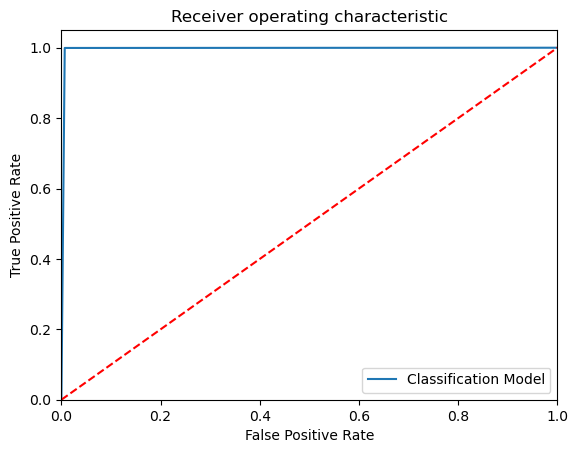

KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[ 23643     59]
 [  1277 189114]]
Outcome values : 
 23643 59 1277 189114
Classification report : 
               precision    recall  f1-score   support

           1       0.95      1.00      0.97     23702
           0       1.00      0.99      1.00    190391

    accuracy                           0.99    214093
   macro avg       0.97      1.00      0.98    214093
weighted avg       0.99      0.99      0.99    214093

Accuracy : 99.4 %
Precision : 94.9 %
Recall : 99.8 %
F1 Score : 0.973
Specificity or True Negative Rate : 99.3 %
Balanced Accuracy : 99.6 %
MCC : 2.659
roc_auc_score: 0.995


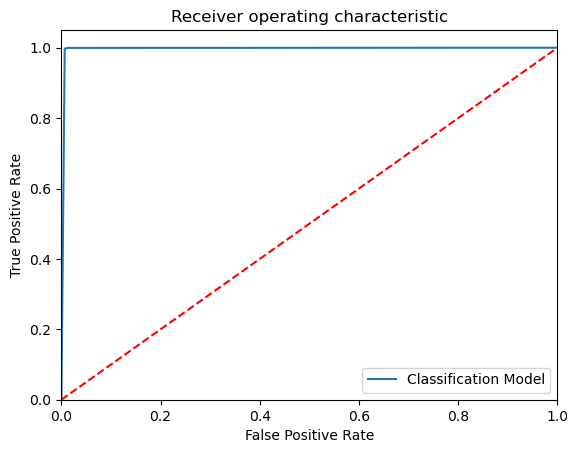

KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[ 23653     49]
 [  2561 187830]]
Outcome values : 
 23653 49 2561 187830
Classification report : 
               precision    recall  f1-score   support

           1       0.90      1.00      0.95     23702
           0       1.00      0.99      0.99    190391

    accuracy                           0.99    214093
   macro avg       0.95      0.99      0.97    214093
weighted avg       0.99      0.99      0.99    214093

Accuracy : 98.8 %
Precision : 90.2 %
Recall : 99.8 %
F1 Score : 0.948
Specificity or True Negative Rate : 98.7 %
Balanced Accuracy : 99.2 %
MCC : 2.286
roc_auc_score: 0.992


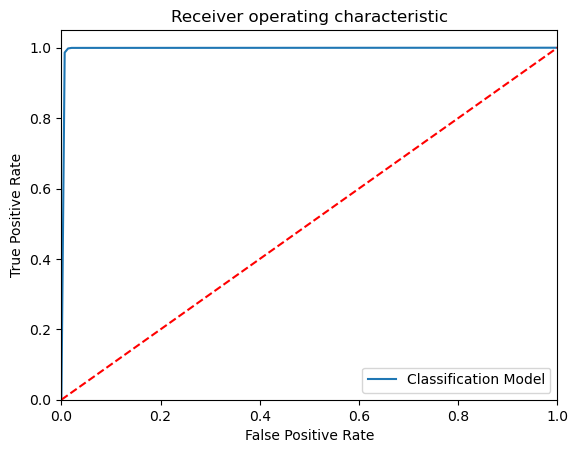

KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[ 23420    282]
 [  2529 187862]]
Outcome values : 
 23420 282 2529 187862
Classification report : 
               precision    recall  f1-score   support

           1       0.90      0.99      0.94     23702
           0       1.00      0.99      0.99    190391

    accuracy                           0.99    214093
   macro avg       0.95      0.99      0.97    214093
weighted avg       0.99      0.99      0.99    214093

Accuracy : 98.7 %
Precision : 90.3 %
Recall : 98.8 %
F1 Score : 0.943
Specificity or True Negative Rate : 98.7 %
Balanced Accuracy : 98.8 %
MCC : 2.323
roc_auc_score: 0.987


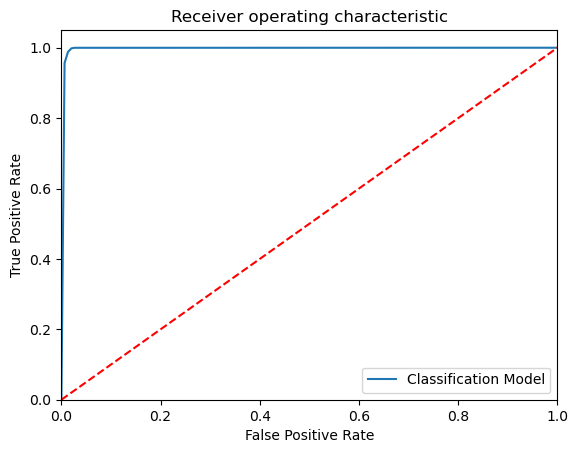

KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[ 23454    248]
 [  3825 186566]]
Outcome values : 
 23454 248 3825 186566
Classification report : 
               precision    recall  f1-score   support

           1       0.86      0.99      0.92     23702
           0       1.00      0.98      0.99    190391

    accuracy                           0.98    214093
   macro avg       0.93      0.98      0.95    214093
weighted avg       0.98      0.98      0.98    214093

Accuracy : 98.1 %
Precision : 86.0 %
Recall : 99.0 %
F1 Score : 0.92
Specificity or True Negative Rate : 98.0 %
Balanced Accuracy : 98.5 %
MCC : 2.051
roc_auc_score: 0.985


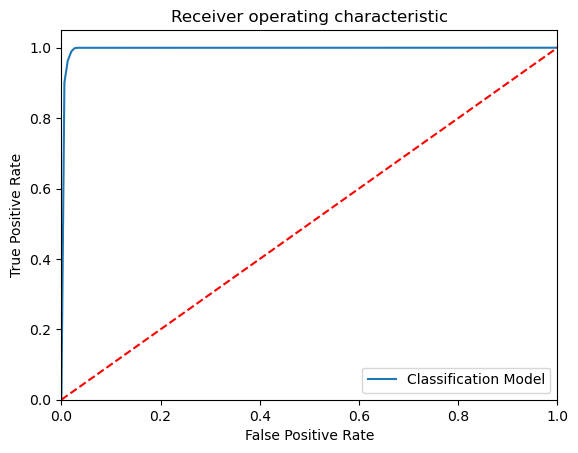

KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[ 22943    759]
 [  3704 186687]]
Outcome values : 
 22943 759 3704 186687
Classification report : 
               precision    recall  f1-score   support

           1       0.86      0.97      0.91     23702
           0       1.00      0.98      0.99    190391

    accuracy                           0.98    214093
   macro avg       0.93      0.97      0.95    214093
weighted avg       0.98      0.98      0.98    214093

Accuracy : 97.9 %
Precision : 86.1 %
Recall : 96.8 %
F1 Score : 0.911
Specificity or True Negative Rate : 98.1 %
Balanced Accuracy : 97.4 %
MCC : 2.116
roc_auc_score: 0.974


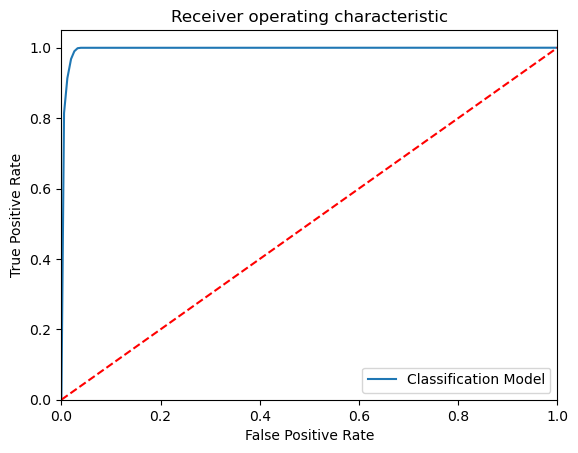

KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[ 23007    695]
 [  4807 185584]]
Outcome values : 
 23007 695 4807 185584
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.97      0.89     23702
           0       1.00      0.97      0.99    190391

    accuracy                           0.97    214093
   macro avg       0.91      0.97      0.94    214093
weighted avg       0.98      0.97      0.98    214093

Accuracy : 97.4 %
Precision : 82.7 %
Recall : 97.1 %
F1 Score : 0.893
Specificity or True Negative Rate : 97.5 %
Balanced Accuracy : 97.3 %
MCC : 1.921
roc_auc_score: 0.973


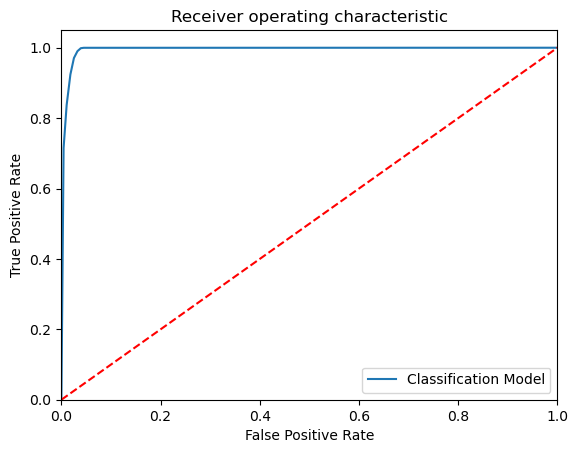

KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[ 22039   1663]
 [  4495 185896]]
Outcome values : 
 22039 1663 4495 185896
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.93      0.88     23702
           0       0.99      0.98      0.98    190391

    accuracy                           0.97    214093
   macro avg       0.91      0.95      0.93    214093
weighted avg       0.97      0.97      0.97    214093

Accuracy : 97.1 %
Precision : 83.1 %
Recall : 93.0 %
F1 Score : 0.877
Specificity or True Negative Rate : 97.6 %
Balanced Accuracy : 95.3 %
MCC : 2.042
roc_auc_score: 0.953


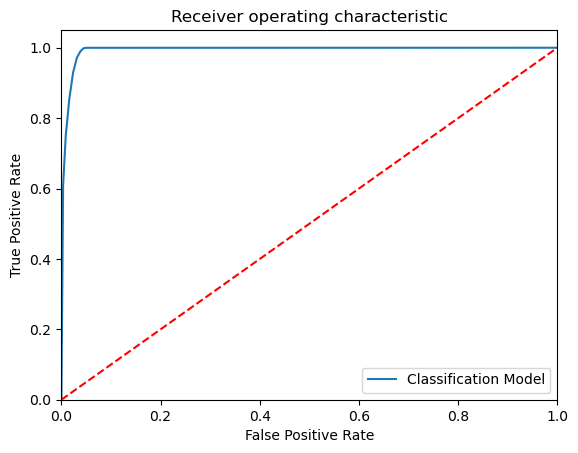

KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[ 22140   1562]
 [  5599 184792]]
Outcome values : 
 22140 1562 5599 184792
Classification report : 
               precision    recall  f1-score   support

           1       0.80      0.93      0.86     23702
           0       0.99      0.97      0.98    190391

    accuracy                           0.97    214093
   macro avg       0.89      0.95      0.92    214093
weighted avg       0.97      0.97      0.97    214093

Accuracy : 96.7 %
Precision : 79.8 %
Recall : 93.4 %
F1 Score : 0.861
Specificity or True Negative Rate : 97.1 %
Balanced Accuracy : 95.2 %
MCC : 1.848
roc_auc_score: 0.952


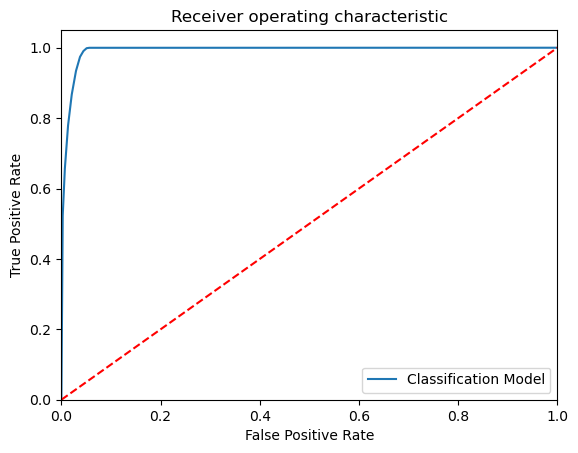

KNN_K_value =  10
Model Name:  KNeighborsClassifier(n_neighbors=10)
Confusion matrix : 
 [[ 20745   2957]
 [  4962 185429]]
Outcome values : 
 20745 2957 4962 185429
Classification report : 
               precision    recall  f1-score   support

           1       0.81      0.88      0.84     23702
           0       0.98      0.97      0.98    190391

    accuracy                           0.96    214093
   macro avg       0.90      0.92      0.91    214093
weighted avg       0.96      0.96      0.96    214093

Accuracy : 96.3 %
Precision : 80.7 %
Recall : 87.5 %
F1 Score : 0.84
Specificity or True Negative Rate : 97.4 %
Balanced Accuracy : 92.4 %
MCC : 2.076
roc_auc_score: 0.925


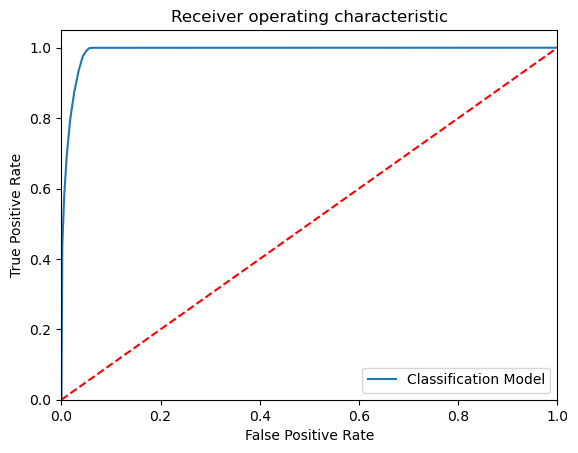

KNN_K_value =  11
Model Name:  KNeighborsClassifier(n_neighbors=11)
Confusion matrix : 
 [[ 20894   2808]
 [  5969 184422]]
Outcome values : 
 20894 2808 5969 184422
Classification report : 
               precision    recall  f1-score   support

           1       0.78      0.88      0.83     23702
           0       0.99      0.97      0.98    190391

    accuracy                           0.96    214093
   macro avg       0.88      0.93      0.90    214093
weighted avg       0.96      0.96      0.96    214093

Accuracy : 95.9 %
Precision : 77.8 %
Recall : 88.2 %
F1 Score : 0.826
Specificity or True Negative Rate : 96.9 %
Balanced Accuracy : 92.6 %
MCC : 1.861
roc_auc_score: 0.925


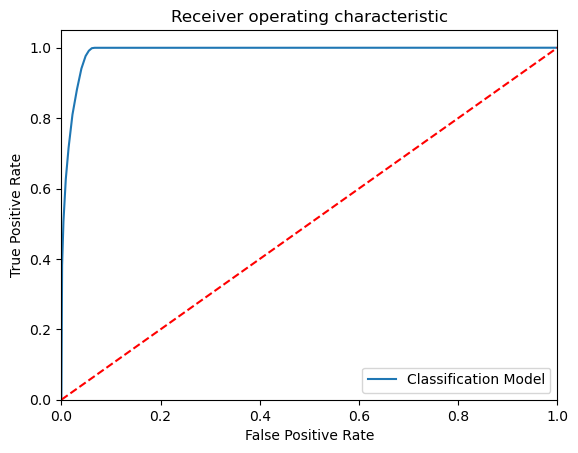

KNN_K_value =  12
Model Name:  KNeighborsClassifier(n_neighbors=12)
Confusion matrix : 
 [[ 19409   4293]
 [  5123 185268]]
Outcome values : 
 19409 4293 5123 185268
Classification report : 
               precision    recall  f1-score   support

           1       0.79      0.82      0.80     23702
           0       0.98      0.97      0.98    190391

    accuracy                           0.96    214093
   macro avg       0.88      0.90      0.89    214093
weighted avg       0.96      0.96      0.96    214093

Accuracy : 95.6 %
Precision : 79.1 %
Recall : 81.9 %
F1 Score : 0.805
Specificity or True Negative Rate : 97.3 %
Balanced Accuracy : 89.6 %
MCC : 2.243
roc_auc_score: 0.896


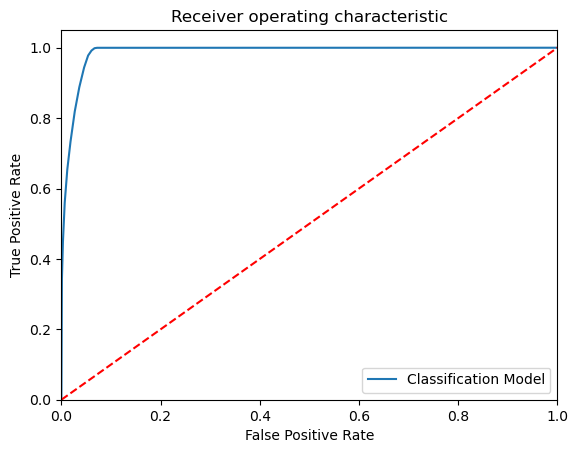

KNN_K_value =  13
Model Name:  KNeighborsClassifier(n_neighbors=13)
Confusion matrix : 
 [[ 19639   4063]
 [  5946 184445]]
Outcome values : 
 19639 4063 5946 184445
Classification report : 
               precision    recall  f1-score   support

           1       0.77      0.83      0.80     23702
           0       0.98      0.97      0.97    190391

    accuracy                           0.95    214093
   macro avg       0.87      0.90      0.89    214093
weighted avg       0.96      0.95      0.95    214093

Accuracy : 95.3 %
Precision : 76.8 %
Recall : 82.9 %
F1 Score : 0.797
Specificity or True Negative Rate : 96.9 %
Balanced Accuracy : 89.9 %
MCC : 1.975
roc_auc_score: 0.899


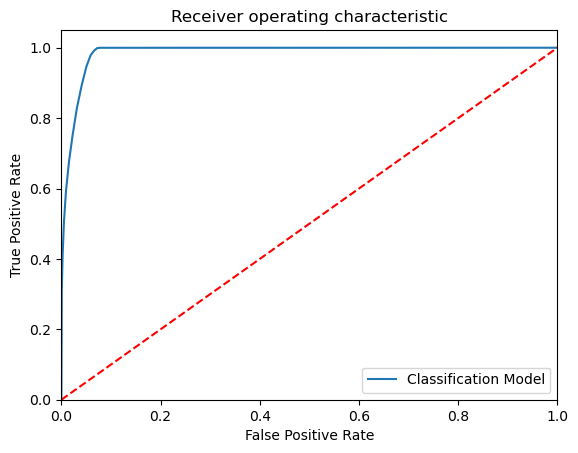

KNN_K_value =  14
Model Name:  KNeighborsClassifier(n_neighbors=14)
Confusion matrix : 
 [[ 18090   5612]
 [  4937 185454]]
Outcome values : 
 18090 5612 4937 185454
Classification report : 
               precision    recall  f1-score   support

           1       0.79      0.76      0.77     23702
           0       0.97      0.97      0.97    190391

    accuracy                           0.95    214093
   macro avg       0.88      0.87      0.87    214093
weighted avg       0.95      0.95      0.95    214093

Accuracy : 95.1 %
Precision : 78.6 %
Recall : 76.3 %
F1 Score : 0.774
Specificity or True Negative Rate : 97.4 %
Balanced Accuracy : 86.8 %
MCC : 2.805
roc_auc_score: 0.869


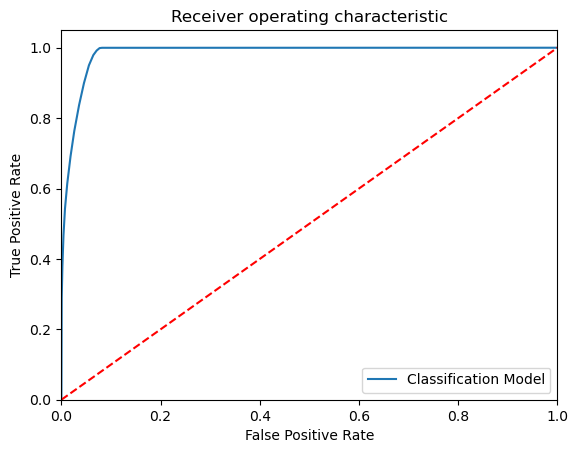

KNN_K_value =  15
Model Name:  KNeighborsClassifier(n_neighbors=15)
Confusion matrix : 
 [[ 18359   5343]
 [  5661 184730]]
Outcome values : 
 18359 5343 5661 184730
Classification report : 
               precision    recall  f1-score   support

           1       0.76      0.77      0.77     23702
           0       0.97      0.97      0.97    190391

    accuracy                           0.95    214093
   macro avg       0.87      0.87      0.87    214093
weighted avg       0.95      0.95      0.95    214093

Accuracy : 94.9 %
Precision : 76.4 %
Recall : 77.5 %
F1 Score : 0.769
Specificity or True Negative Rate : 97.0 %
Balanced Accuracy : 87.2 %
MCC : 2.289
roc_auc_score: 0.872


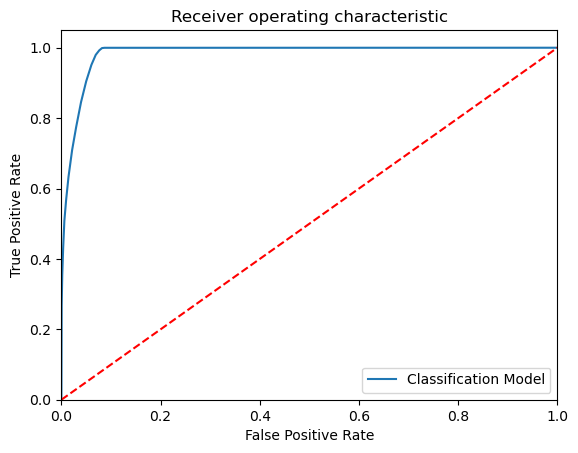

KNN_K_value =  16
Model Name:  KNeighborsClassifier(n_neighbors=16)
Confusion matrix : 
 [[ 17150   6552]
 [  4754 185637]]
Outcome values : 
 17150 6552 4754 185637
Classification report : 
               precision    recall  f1-score   support

           1       0.78      0.72      0.75     23702
           0       0.97      0.98      0.97    190391

    accuracy                           0.95    214093
   macro avg       0.87      0.85      0.86    214093
weighted avg       0.95      0.95      0.95    214093

Accuracy : 94.7 %
Precision : 78.3 %
Recall : 72.4 %
F1 Score : 0.752
Specificity or True Negative Rate : 97.5 %
Balanced Accuracy : 84.9 %
MCC : 4.25
roc_auc_score: 0.849


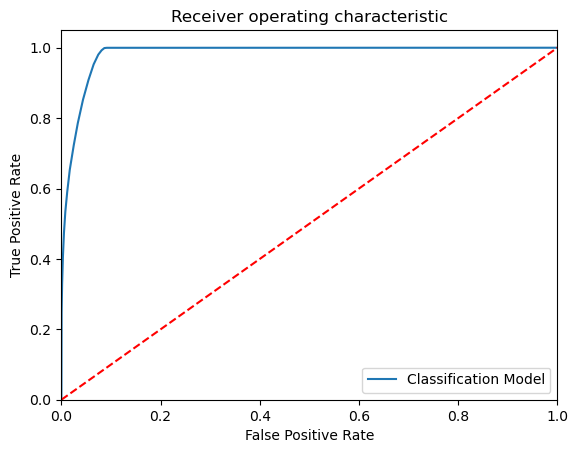

KNN_K_value =  17
Model Name:  KNeighborsClassifier(n_neighbors=17)
Confusion matrix : 
 [[ 17477   6225]
 [  5303 185088]]
Outcome values : 
 17477 6225 5303 185088
Classification report : 
               precision    recall  f1-score   support

           1       0.77      0.74      0.75     23702
           0       0.97      0.97      0.97    190391

    accuracy                           0.95    214093
   macro avg       0.87      0.85      0.86    214093
weighted avg       0.95      0.95      0.95    214093

Accuracy : 94.6 %
Precision : 76.7 %
Recall : 73.7 %
F1 Score : 0.752
Specificity or True Negative Rate : 97.2 %
Balanced Accuracy : 85.4 %
MCC : 2.899
roc_auc_score: 0.855


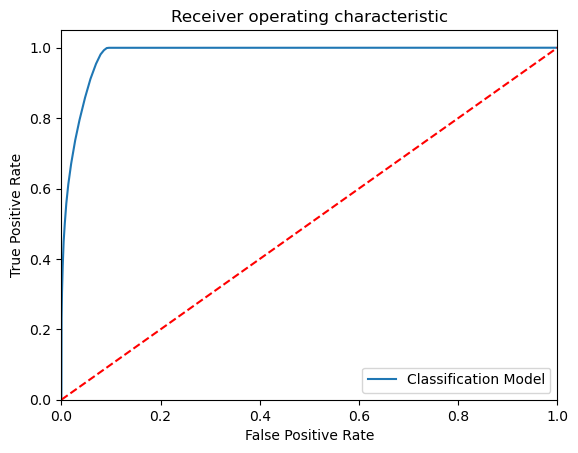

KNN_K_value =  18
Model Name:  KNeighborsClassifier(n_neighbors=18)
Confusion matrix : 
 [[ 16283   7419]
 [  4203 186188]]
Outcome values : 
 16283 7419 4203 186188
Classification report : 
               precision    recall  f1-score   support

           1       0.79      0.69      0.74     23702
           0       0.96      0.98      0.97    190391

    accuracy                           0.95    214093
   macro avg       0.88      0.83      0.85    214093
weighted avg       0.94      0.95      0.94    214093



ValueError: math domain error

In [30]:
# Bild KNN Model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import sklearn.metrics as metrics

from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 21, 1):
    
    k = a
    
    # Build the model
    
    ModelKNN = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    
    ModelKNN.fit(x_train, y_train)
    
    # Predict the model
    
    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)
    
    print('KNN_K_value = ', a)
    
    # Print the model name
    
    print('Model Name: ', ModelKNN)
    
    # confusion matrix in sklearn
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    
    # actual values
    
    actual = y_test
    
    # predicted values
    
    predicted = y_pred
    
    # confusion matrix
    
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)
    
    # outcome values order in sklearn
    
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)
    
    # classification report for precision, recall f1-score and accuracy
    
    C_Report = classification_report(actual,predicted,labels=[1,0])
    
    print('Classification report : \n', C_Report)
    
    # calculating the metrics
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model
    
    from math import sqrt
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    
    
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
    
    # Area under ROC curve 
    
    from sklearn.metrics import roc_curve, roc_auc_score
    
    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()
    #------------------------------------------------------------------------------
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    KNN_Results = KNN_Results.append(new_row, ignore_index=True)
    #------KNN_Results------------------------------------------------------------------------

In [29]:
KNN_Results

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,KNeighborsClassifier(n_neighbors=1),1,47667,0,1150,379368,0.997,0.976,1.000,0.988,0.997,9.192,0.998489,0.998
1,KNeighborsClassifier(n_neighbors=2),2,47667,0,1150,379368,0.997,0.976,1.000,0.988,0.997,9.192,0.998489,0.998
2,KNeighborsClassifier(n_neighbors=1),1,47667,0,1150,379368,0.997,0.976,1.000,0.988,0.997,0.000,0.998489,0.998
3,KNeighborsClassifier(n_neighbors=2),2,47667,0,1150,379368,0.997,0.976,1.000,0.988,0.997,0.000,0.998489,0.998
4,KNeighborsClassifier(n_neighbors=3),3,47667,0,2416,378102,0.994,0.952,1.000,0.975,0.994,0.000,0.996825,0.997
5,KNeighborsClassifier(n_neighbors=4),4,47667,0,2416,378102,0.994,0.952,1.000,0.975,0.994,0.000,0.996825,0.997
6,KNeighborsClassifier(),5,47667,0,3641,376877,0.991,0.929,1.000,0.963,0.990,0.000,0.995216,0.995
7,KNeighborsClassifier(n_neighbors=6),6,47667,0,3641,376877,0.991,0.929,1.000,0.963,0.990,0.000,0.995216,0.995
8,KNeighborsClassifier(n_neighbors=7),7,47667,0,4889,375629,0.989,0.907,1.000,0.951,0.987,0.000,0.993576,0.994
9,KNeighborsClassifier(n_neighbors=8),8,47629,38,4878,375640,0.989,0.907,0.999,0.951,0.987,0.000,0.993192,0.993


In [27]:
EMResults1=pd.read_csv(r'EMResults.csv',header=0)
EMResults1

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# SVM-Linear Kernel

In [ ]:
# Training the SVM algorithm with train dataset

from sklearn.svm import SVC

ModelSVM1 = SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True, 
                probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, 
                max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

# Train the model with train data 

ModelSVM1 = ModelSVM1.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVM1.predict(x_test)
y_pred_prob = ModelSVM1.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Linear")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

# mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
# MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
MCC=0

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual,ModelSVM1.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Linear",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = EMResults1.append(new_row, ignore_index=True)
#-------------------------------------------------------------------------------------------------------------

# SVM Polynomial

In [ ]:
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMPoly = SVC(kernel='poly', degree=2, probability=True)

# Train the model

ModelSVMPoly.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMPoly.predict(x_test)
y_pred_prob = ModelSVMPoly.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Polynominal")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMPoly.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Polynominal",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = EMResults1.append(new_row, ignore_index=True)
#-----------------------------------------------------------------------------------------------

# SVM-Gaussian

In [ ]:
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMGaussian = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)

# Train the model

ModelSVMGaussian.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMGaussian.predict(x_test)
y_pred_prob = ModelSVMGaussian.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Print the model name
    
print('Model Name: ', "SVM - Gaussian")

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMGaussian.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Gaussian",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = EMResults1.append(new_row, ignore_index=True)
#---------------------------------------------------------------------------------------------------------------

# SVM -Sigmoid

In [ ]:
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMSig = SVC(kernel='sigmoid', random_state = 42, class_weight='balanced', probability=True)

# Train the model

ModelSVMSig.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMSig.predict(x_test)
y_pred_prob = ModelSVMSig.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Sigmoid")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMSig.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Sigmoid",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = EMResults1.append(new_row, ignore_index=True)
#-----------------------------------------------------------------------------------------------------------

In [25]:
EMResults=pd.read_csv(r'EMResults.csv',header=0)
EMResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[ 10308  13394]
 [   850 189541]]
Outcome values : 
 10308 13394 850 189541
Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.43      0.59     23702
           0       0.93      1.00      0.96    190391

    accuracy                           0.93    214093
   macro avg       0.93      0.72      0.78    214093
weighted avg       0.93      0.93      0.92    214093

Accuracy : 93.3 %
Precision : 92.4 %
Recall : 43.5 %
F1 Score : 0.591
Specificity or True Negative Rate : 99.6 %
Balanced Accuracy : 71.6 %
MCC : 0
roc_auc_score: 0.715


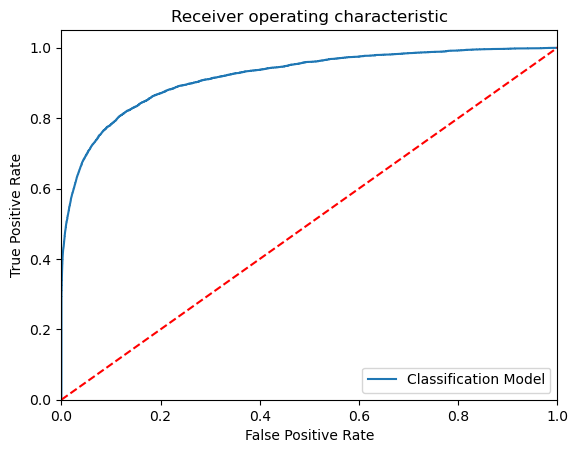

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 16174   7528]
 [    58 190333]]
Outcome values : 
 16174 7528 58 190333
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.68      0.81     23702
           0       0.96      1.00      0.98    190391

    accuracy                           0.96    214093
   macro avg       0.98      0.84      0.90    214093
weighted avg       0.97      0.96      0.96    214093

Accuracy : 96.5 %
Precision : 99.6 %
Recall : 68.2 %
F1 Score : 0.81
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 84.1 %
MCC : 0
roc_auc_score: 0.841


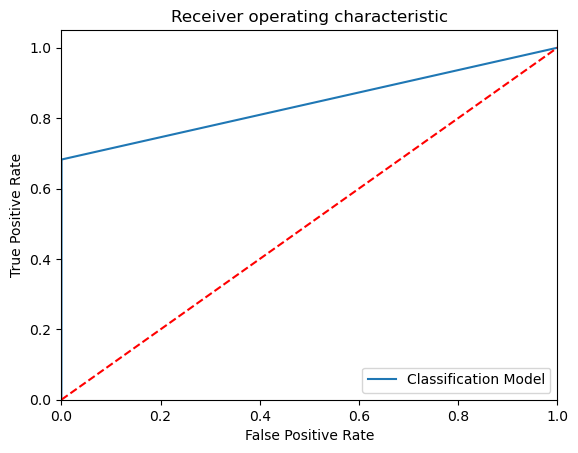

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[ 20780   2922]
 [    25 190366]]
Outcome values : 
 20780 2922 25 190366
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.88      0.93     23702
           0       0.98      1.00      0.99    190391

    accuracy                           0.99    214093
   macro avg       0.99      0.94      0.96    214093
weighted avg       0.99      0.99      0.99    214093

Accuracy : 98.6 %
Precision : 99.9 %
Recall : 87.7 %
F1 Score : 0.934
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 93.8 %
MCC : 0
roc_auc_score: 0.938


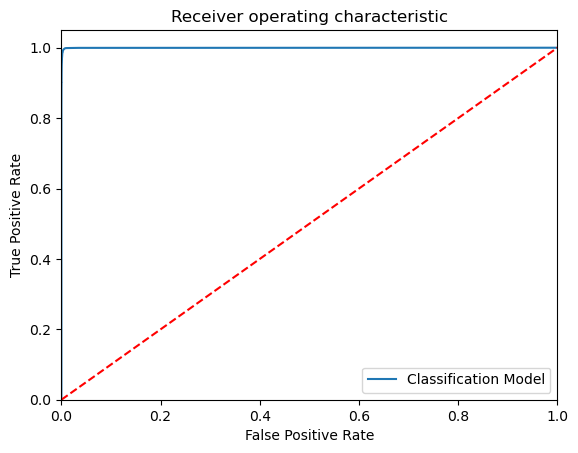

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[ 22502   1200]
 [    23 190368]]
Outcome values : 
 22502 1200 23 190368
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.95      0.97     23702
           0       0.99      1.00      1.00    190391

    accuracy                           0.99    214093
   macro avg       1.00      0.97      0.99    214093
weighted avg       0.99      0.99      0.99    214093

Accuracy : 99.4 %
Precision : 99.9 %
Recall : 94.9 %
F1 Score : 0.974
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 97.4 %
MCC : 0
roc_auc_score: 0.975


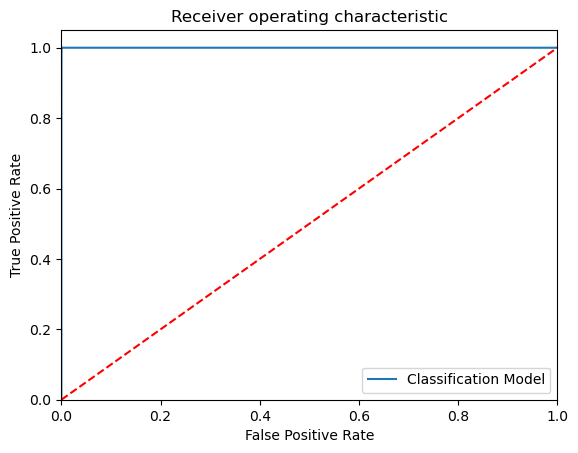

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[ 23692     10]
 [  1183 189208]]
Outcome values : 
 23692 10 1183 189208
Classification report : 
               precision    recall  f1-score   support

           1       0.95      1.00      0.98     23702
           0       1.00      0.99      1.00    190391

    accuracy                           0.99    214093
   macro avg       0.98      1.00      0.99    214093
weighted avg       0.99      0.99      0.99    214093

Accuracy : 99.4 %
Precision : 95.2 %
Recall : 100.0 %
F1 Score : 0.975
Specificity or True Negative Rate : 99.4 %
Balanced Accuracy : 99.7 %
MCC : 0
roc_auc_score: 0.997


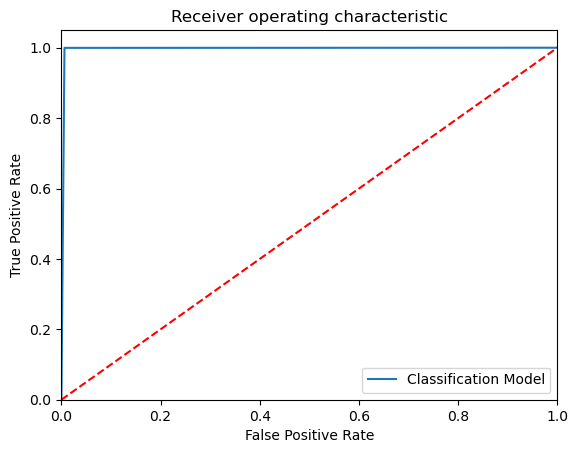

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[  8415  15287]
 [  4274 186117]]
Outcome values : 
 8415 15287 4274 186117
Classification report : 
               precision    recall  f1-score   support

           1       0.66      0.36      0.46     23702
           0       0.92      0.98      0.95    190391

    accuracy                           0.91    214093
   macro avg       0.79      0.67      0.71    214093
weighted avg       0.90      0.91      0.90    214093

Accuracy : 90.9 %
Precision : 66.3 %
Recall : 35.5 %
F1 Score : 0.462
Specificity or True Negative Rate : 97.8 %
Balanced Accuracy : 66.6 %
MCC : 0
roc_auc_score: 0.666


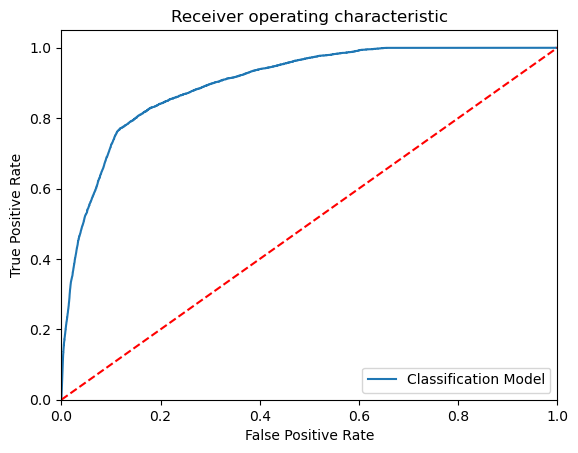

-----------------------------------------------------------------------------------------------------


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Create objects of classification algorithms with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=1)
ModelGNB = GaussianNB()
ModelSVM = SVC(probability=True)

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelSVM]
#MM = [ModelLR, ModelDC, ModelRF, ModelET]
for models in MM:
            
    # Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt
    
    #mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    #MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    MCC=0

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------
#======================================================================================================================>

In [ ]:
EMResults


In [ ]:
y_predKNN=ModelKNN.predict(x_test)

In [ ]:
results=pd.DataFrame({'isFraud_A':y_test,'isFraud_P':y_predKNN})

resultsfinal=dfbk1.merge(results,left_index=True,right_index=True)

resultsfinal.sample(10)